## **1. Tentang Dataset Iris Species**

Dataset Iris (atau dikenal juga sebagai *Iris flower dataset*) adalah salah satu dataset paling terkenal dalam dunia ilmu data dan pembelajaran mesin. Dataset ini pertama kali diperkenalkan oleh ahli biologi statistik Ronald Fisher pada tahun 1936 untuk mengilustrasikan teknik klasifikasi.

Dataset ini berisi 150 sampel bunga Iris, yang terbagi rata menjadi 3 spesies:
- *Iris setosa*
- *Iris versicolor*
- *Iris virginica*

Untuk setiap bunga, terdapat 4 fitur pengukuran numerik:
- **SepalLengthCm**: panjang sepal (cm)
- **SepalWidthCm**: lebar sepal (cm)
- **PetalLengthCm**: panjang petal (cm)
- **PetalWidthCm**: lebar petal (cm)

Tujuan utama dari dataset ini biasanya adalah untuk mengklasifikasikan spesies bunga berdasarkan keempat fitur tersebut. Namun, dalam proyek ini, kita akan fokus pada Exploratory Data Analysis (EDA) untuk memahami pola, distribusi, dan hubungan antar variabel dalam data.

## **2. Data Cleaning**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('/kaggle/input/iris/Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Id,150.0,75.500000,43.445368,1.0,38.25,75.50,112.75,150.0
SepalLengthCm,150.0,5.843333,0.828066,4.3,5.10,5.80,6.40,7.9
SepalWidthCm,150.0,3.054000,0.433594,2.0,2.80,3.00,3.30,4.4
PetalLengthCm,150.0,3.758667,1.764420,1.0,1.60,4.35,5.10,6.9
PetalWidthCm,150.0,1.198667,0.763161,0.1,0.30,1.30,1.80,2.5


In [6]:
df = df.drop(columns='Id')

### **Penjelasan**

**Link dataset**: [Iris Dataset on Kaggle](https://www.kaggle.com/datasets/uciml/iris )

Dataset ini memiliki 6 kolom awal, namun kita fokus pada 5 kolom utama setelah preprocessing:

1. **Id**: Nomor urut sampel → *tidak relevan untuk analisis, dihapus.*
2. **SepalLengthCm**: Panjang sepal (cm)
3. **SepalWidthCm**: Lebar sepal (cm)
4. **PetalLengthCm**: Panjang petal (cm)
5. **PetalWidthCm**: Lebar petal (cm)
6. **Species**: Spesies bunga (*Iris-setosa*, *Iris-versicolor*, *Iris-virginica*)


### Apa yang dapat kita pahami dari data ini:

- Dataset berisi 150 baris dan 6 kolom awal.
- Tidak ada nilai null.
- Semua fitur numerik memiliki distribusi yang bisa dieksplorasi lebih lanjut.
- Kolom `Id` tidak memberikan informasi prediktif → dihapus.
- Statistik deskriptif menunjukkan variasi yang signifikan antar fitur — misalnya, panjang petal lebih bervariasi dibanding lebar sepal.
- Target (`Species`) adalah kategorikal dengan 3 kelas seimbang (50 sampel per spesies).

## **3. Apa Itu Exploratory Data Analysis (EDA)?**

**Exploratory Data Analysis (EDA)** adalah proses menganalisis dan memvisualisasikan data untuk:
- Memahami struktur dan kualitas data
- Menemukan pola, tren, atau hubungan antar variabel
- Mendeteksi outlier (data tidak biasa) atau nilai yang hilang
- Menentukan langkah selanjutnya dalam analisis atau pemodelan

Dalam konteks dataset Iris, EDA akan membantu kita menjawab pertanyaan seperti:
- Bagaimana distribusi panjang dan lebar sepal/petal di tiap spesies?
- Apakah ada perbedaan yang jelas antar spesies berdasarkan fitur-fitur tersebut?
- Fitur mana yang paling membedakan satu spesies dari yang lain?

EDA biasanya melibatkan:
- **Statistik deskriptif** (misalnya: rata-rata, median, rentang nilai)
- **Visualisasi data** seperti histogram, boxplot, scatter plot, dan pairplot

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  

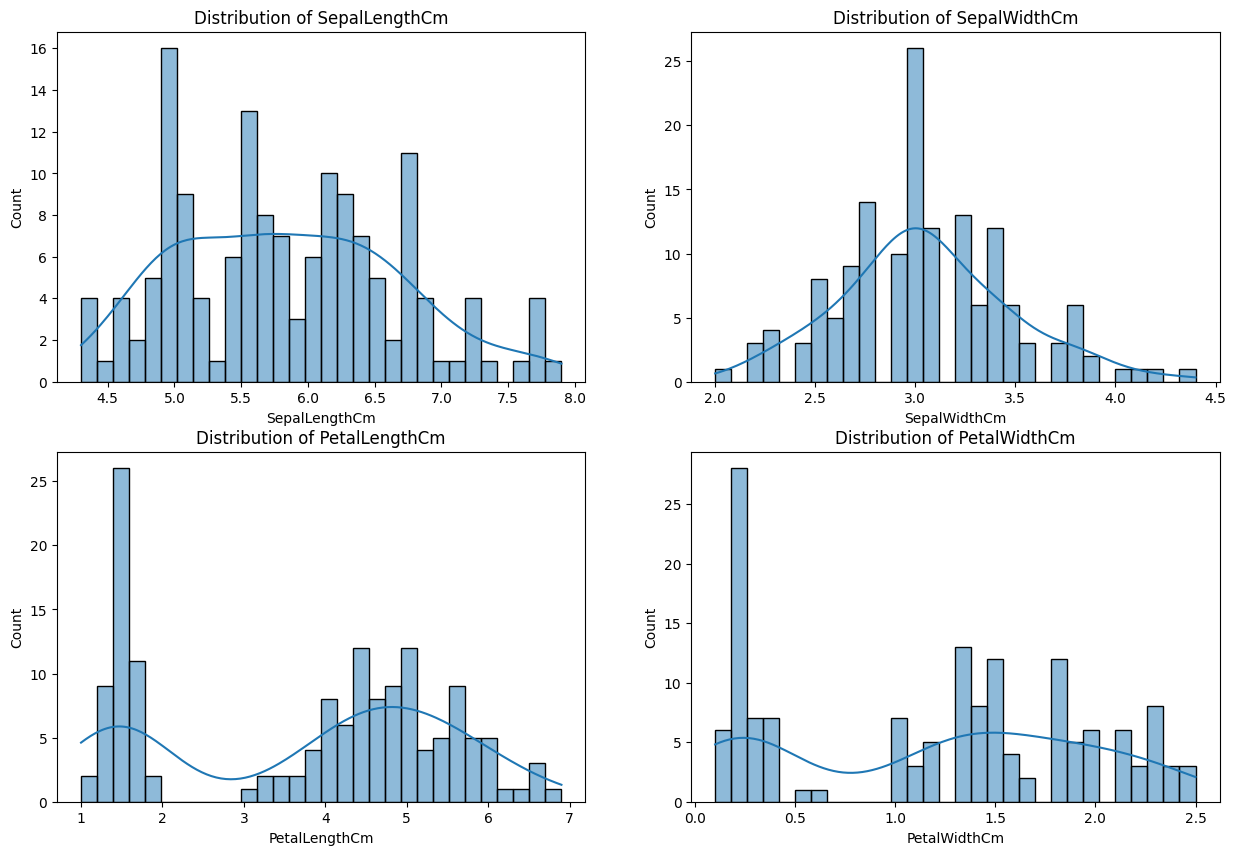

In [7]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.histplot(data=df, x='SepalLengthCm', kde=True, bins=30)
plt.title(f'Distribution of SepalLengthCm')
plt.subplot(2,2,2)
sns.histplot(data=df, x='SepalWidthCm', kde=True, bins=30)
plt.title(f'Distribution of SepalWidthCm')
plt.subplot(2,2,3)
sns.histplot(data=df, x='PetalLengthCm', kde=True, bins=30)
plt.title(f'Distribution of PetalLengthCm')
plt.subplot(2,2,4)
sns.histplot(data=df, x='PetalWidthCm', kde=True, bins=30)
plt.title(f'Distribution of PetalWidthCm')
plt.show()

### **Penjelasan**

Berikut adalah histogram dari keempat fitur numerik dataset Iris, lengkap dengan kurva densitas (KDE) untuk melihat bentuk distribusi datanya:

-  **SepalLengthCm**:  
  Distribusi cenderung normal, berkisar antara 4.5–8.0 cm. Mayoritas bunga memiliki panjang sepal sekitar 5.5–6.5 cm.

-  **SepalWidthCm**:  
  Distribusi sedikit miring ke kiri, dengan nilai dominan di sekitar 2.8–3.5 cm. Ada sedikit outlier di atas 4.0 cm.

-  **PetalLengthCm**:  
  Distribusi bimodal, artinya ada dua kelompok utama: satu di sekitar 1.5 cm (kemungkinan *Iris-setosa*) dan satu lagi di 4.5–5.5 cm (spesies lain). Ini menunjukkan bahwa petal length sangat membedakan spesies.

-  **PetalWidthCm**:  
  Juga bimodal, dengan puncak pertama di ~0.2 cm (setosa) dan puncak kedua di 1.0–2.0 cm (versicolor & virginica). Sangat berguna untuk klasifikasi.

>  **Insight penting**:  
Fitur petal (panjang & lebar) jauh lebih membedakan antar spesies dibanding sepal, karena distribusinya lebih terpisah dan sering menunjukkan pola bimodal.

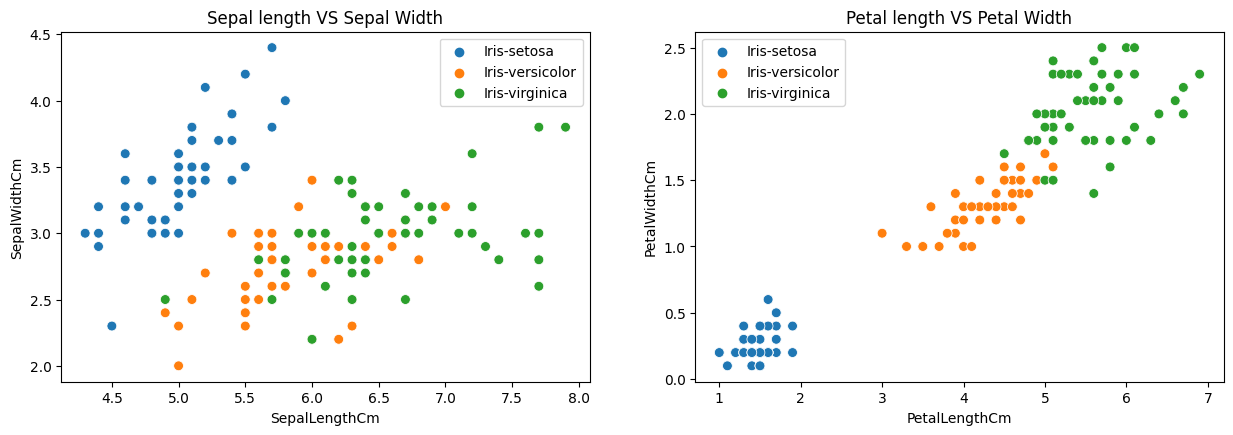

In [8]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.scatterplot(data=df, x='SepalLengthCm', y='SepalWidthCm', hue='Species', s=50)
plt.title('Sepal length VS Sepal Width')
plt.legend(title='', loc='upper right')
plt.subplot(2,2,2)
sns.scatterplot(data=df, x='PetalLengthCm', y='PetalWidthCm', hue='Species', s=50)
plt.title('Petal length VS Petal Width')
plt.legend(title='', loc='upper left')
plt.show()

### **Penjelasan**

Visualisasi Scatter Plot: hubungan antar fitur per spesies ini membandingkan dua pasang fitur:

-  **Sepal Length VS Sepal Width**:  
  - Titik-titik dari ketiga spesies tumpang tindih cukup banyak, terutama antara *versicolor* dan *virginica*.  
  - *Setosa* agak terpisah, tapi tidak sepenuhnya.  
  → Menunjukkan bahwa sepal saja kurang memadai untuk membedakan spesies secara akurat.

-  **Petal Length VS Petal Width**:  
  - Pola sangat jelas:  
    - *Iris-setosa* (biru) terpisah jauh di kiri bawah (petal kecil).  
    - *Iris-versicolor* (orange) berada di tengah.  
    - *Iris-virginica* (hijau) tersebar di kanan atas (petal lebih besar).  
  → Fitur petal sangat kuat untuk membedakan spesies, hampir sempurna terpisah.

-  **Insight utama**:  
  >  **Petal length dan petal width adalah fitur paling diskriminatif** untuk klasifikasi spesies Iris.  
  Sementara sepal lebih bersifat umum dan kurang membedakan.

In [9]:
X = df.drop(columns='Species')
y = df['Species']

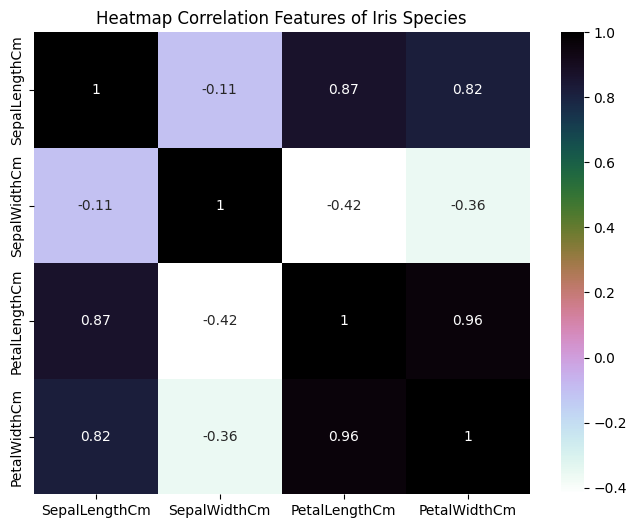

In [10]:
plt.figure(figsize=(8,6))
sns.heatmap(data=X.corr(), annot=True, cmap='cubehelix_r')
plt.title('Heatmap Correlation Features of Iris Species')
plt.show()

### **Penjelasan**

Visualisasi ini menunjukkan kuatnya hubungan linier antar fitur numerik* menggunakan koefisien korelasi Pearson (skala -1 hingga +1):

-  **PetalLengthCm & PetalWidthCm**:  
  → Korelasi sangat tinggi: **0.96**  
  → Artinya, semakin panjang petal, semakin lebar pula — sangat berkaitan erat.

-  **SepalLengthCm & PetalLengthCm**:  
  → Korelasi kuat: **0.87**  
  → Panjang sepal cenderung sejalan dengan panjang petal.

-  **SepalLengthCm & PetalWidthCm**:  
  → Korelasi cukup tinggi: **0.82**  
  → Menunjukkan pola konsisten antara ukuran sepal dan petal.

-  **SepalWidthCm & lainnya**:  
  → Semua korelasinya lemah hingga negatif (misal: -0.11, -0.42, -0.36)  
  → Artinya, lebar sepal tidak banyak berhubungan dengan fitur lain — bisa jadi kurang penting untuk model prediktif.

-  Tidak ada korelasi negatif yang signifikan, semua hubungan bersifat positif atau netral.

>  **Insight utama**:  
Fitur petal (panjang & lebar) saling berkorelasi tinggi dan juga berkorelasi kuat dengan panjang sepal — menunjukkan bahwa mereka membawa informasi serupa yang sangat berguna untuk klasifikasi.

<Axes: xlabel='Species', ylabel='SepalWidthCm'>

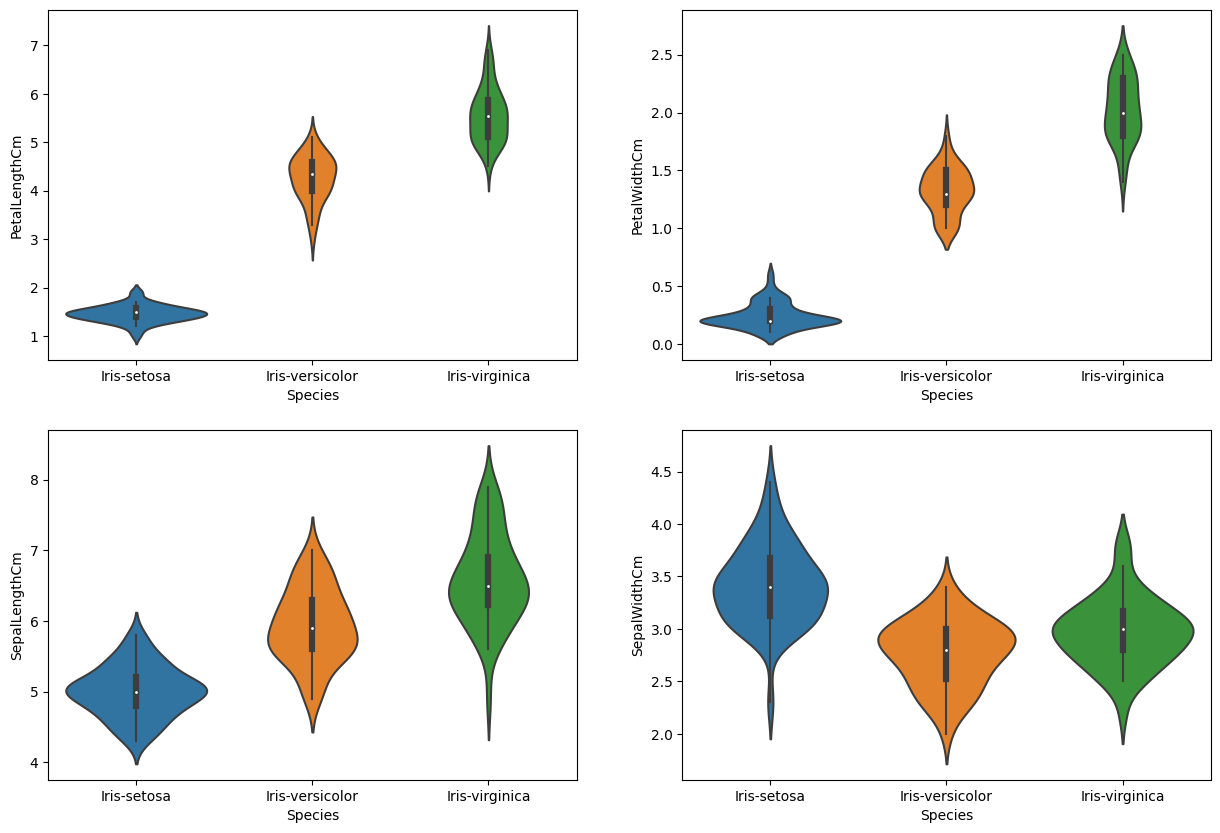

In [11]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.violinplot(x='Species',y='PetalLengthCm',data=df)
plt.subplot(2,2,2)
sns.violinplot(x='Species',y='PetalWidthCm',data=df)
plt.subplot(2,2,3)
sns.violinplot(x='Species',y='SepalLengthCm',data=df)
plt.subplot(2,2,4)
sns.violinplot(x='Species',y='SepalWidthCm',data=df)

### **Penjelasan**

Visualisasi ini menunjukkan distribusi dan spread nilai setiap fitur, dibagi berdasarkan spesies (*Iris-setosa*, *Iris-versicolor*, *Iris-virginica*). Bentuk violin menggambarkan densitas data, sementara garis tengah menunjukkan median:

-  **PetalLengthCm**:  
  → *Setosa*: sangat pendek (1.0–2.0 cm)  
  → *Versicolor*: sedang (3.5–5.0 cm)  
  → *Virginica*: paling panjang (4.5–7.0 cm)  
  → Sangat terpisah, fitur terbaik untuk membedakan spesies!

-  **PetalWidthCm**:  
  → Pola serupa dengan petal length: *setosa* sangat sempit, *virginica* paling lebar.  
  → Korelasi tinggi antara panjang & lebar petal terkonfirmasi secara visual.

-  **SepalLengthCm**:  
  → *Setosa* cenderung lebih pendek, tapi tumpang tindih dengan *versicolor*.  
  → *Virginica* paling panjang, tapi masih ada overlap.  
  → Kurang membedakan dibanding petal.

-  **SepalWidthCm**:  
  → *Setosa* cenderung lebih lebar, tapi distribusinya tumpang tindih banyak dengan dua spesies lain.  
  → Paling kurang membedakan, bisa jadi fitur paling lemah untuk klasifikasi.

>  **Insight utama**:  
Fitur petal (panjang & lebar) menunjukkan pemisahan yang sangat jelas antar spesies, sementara sepal (terutama lebar) relatif tumpang tindih dan kurang informatif.